In [ ]:
from tensorflow.keras.models import model_from_json
from keras.models import load_model
import imageio
import glob
from imageio import imread
from PIL import Image
from skimage.transform import resize as imresize
import matplotlib.pyplot as plt
import sys, os
import math
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import skimage


In [ ]:
def mse(target, ref):
    target_data = target.astype(np.float32)
    ref_data = ref.astype(np.float32)
    err = np.sum((target_data - ref_data) ** 2)
    
    err /= np.float(target_data.shape[0] * target_data.shape[1])
    return err

In [ ]:
def psnr(target, ref):
    
    target_data = target.astype(np.float32)
    ref_data = ref.astype(np.float32)
    
    diff = ref_data - target_data
    diff = diff.flatten('C')
    
    rmse = np.sqrt(np.mean(diff ** 2.))
    
    return 20 * np.log10(255. / rmse)

In [ ]:
# data path
TRAIN_PATH = r'/content/drive/MyDrive/SRCNN_Data/General100 Dataset'

data_path = TRAIN_PATH

# defining the shape of low resolution image (LR) 
low_resolution_shape = (64, 64, 3)

# defining the shape of high resolution image (HR) 
high_resolution_shape = (256, 256, 3)

In [ ]:
# load json and create model
json_file = open('/content/drive/MyDrive/SRCNN_Data/Model/General100_Main.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
general100_srgan = model_from_json(loaded_model_json)

# load weights into new model
general100_srgan.load_weights('/content/drive/MyDrive/SRCNN_Data/Model/General100_Main.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
def get_train_images(data_path):

    image_list = []

    image_list.extend(sorted(glob.glob(data_path +  '/*')))
    
    return image_list 
    
image_list = get_train_images(data_path)   

In [ ]:
def sample_images(image_list, high_resolution_shape, low_resolution_shape):
    
    """
    Pre-process a batch of training images
    """
    
    # image_list is the list of all images
    # ransom sample a batch of images
    # images_batch = np.random.choice(image_list, size=batch_size)
    images_batch = image_list
    lr_images = []
    hr_images = []
    
    print(len(image_list))
    for img in images_batch:
  
        img1 = imread(img, as_gray=False, pilmode='RGB')
        #img1 = imread(img, pilmode='RGB')
        img1 = img1.astype(np.float32)
        
        # change the size     
        img1_high_resolution = imresize(img1, high_resolution_shape)
        img1_low_resolution = imresize(img1, low_resolution_shape)
                

        # do a random horizontal flip
        if np.random.random() < 0.5:
            img1_high_resolution = np.fliplr(img1_high_resolution)
            img1_low_resolution = np.fliplr(img1_low_resolution)
       
        hr_images.append(img1_high_resolution)
        lr_images.append(img1_low_resolution)
        
   
    # convert lists into numpy ndarrays
    return np.array(hr_images), np.array(lr_images)

**General 100 Results**

In [ ]:
image_list = get_train_images(data_path)   
hr_images, lr_images = sample_images(image_list, 
                                    low_resolution_shape=low_resolution_shape,
                                    high_resolution_shape=high_resolution_shape)


# normalize the images
hr_images = hr_images / 127.5 - 1.
lr_images = lr_images / 127.5 - 1.

# generate high-resolution images from low-resolution images
generated_high_resolution_images = general100_srgan.predict(lr_images)

75


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


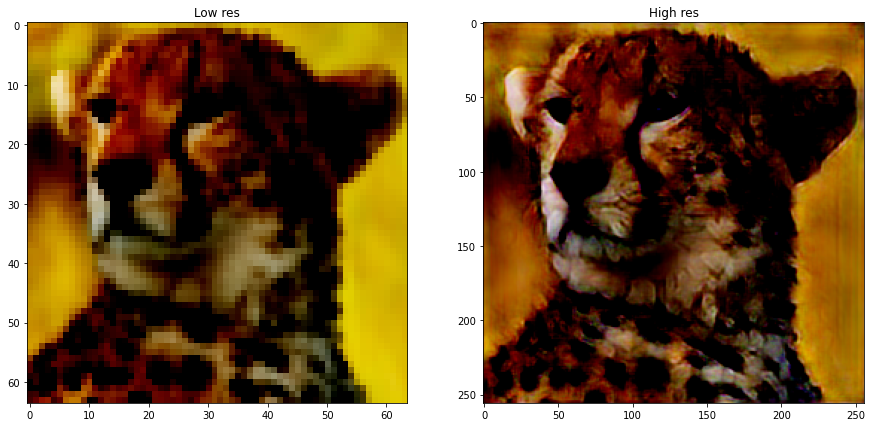

MSE : 0.08289942890405655, PSNR: 63.716500636513345


In [ ]:
index = 7

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

ps = psnr(hr_images[index], generated_high_resolution_images[index])          
ms = mse(hr_images[index], generated_high_resolution_images[index])      
print("MSE : {}, PSNR: {}".format(ms,ps))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


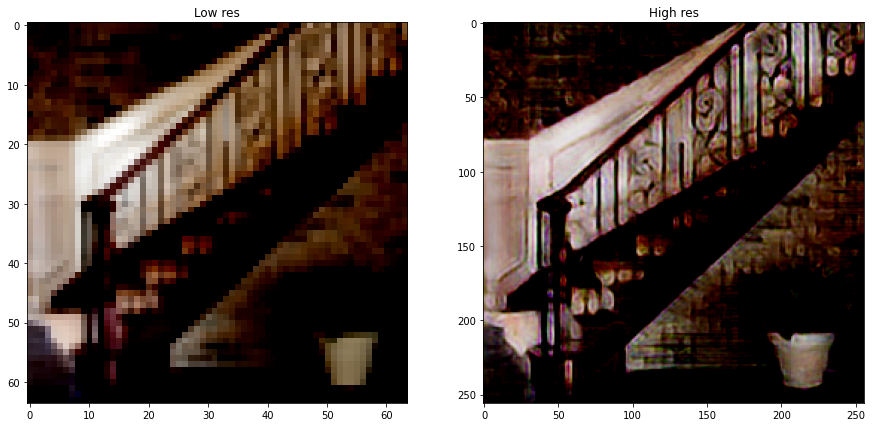

MSE : 0.11404071003198624, PSNR: 62.33141671640523


In [ ]:
index = 4

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

ps = psnr(hr_images[index], generated_high_resolution_images[index])          
ms = mse(hr_images[index], generated_high_resolution_images[index])      
print("MSE : {}, PSNR: {}".format(ms,ps))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


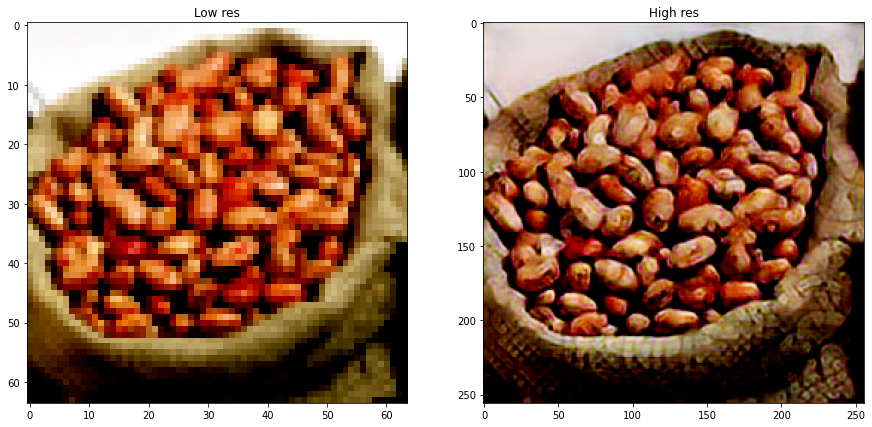

MSE : 0.17135702073574066, PSNR: 60.562996951382495


In [ ]:
index = 33

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

ps = psnr(hr_images[index], generated_high_resolution_images[index])          
ms = mse(hr_images[index], generated_high_resolution_images[index])      
print("MSE : {}, PSNR: {}".format(ms,ps))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


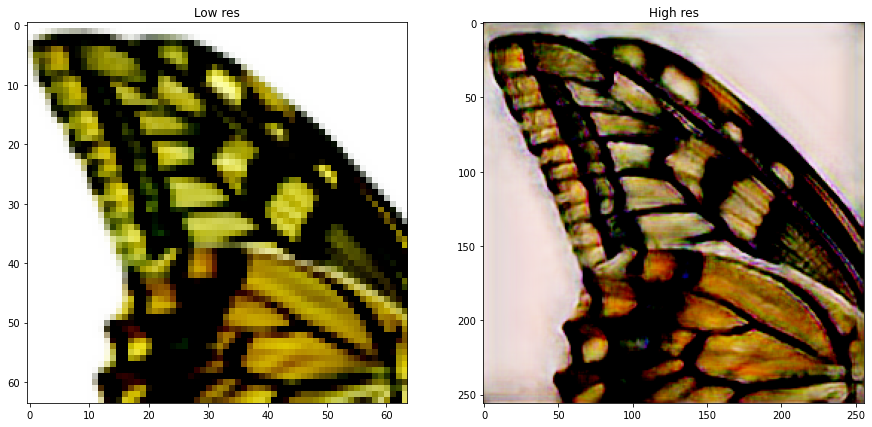

MSE : 0.1523309051990509, PSNR: 61.074135691148015


In [ ]:
index = 13

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

ps = psnr(hr_images[index], generated_high_resolution_images[index])          
ms = mse(hr_images[index], generated_high_resolution_images[index])      
print("MSE : {}, PSNR: {}".format(ms,ps))

<h1> Testing Path </h1>

In [ ]:
# data path
TESTING_PATH = r'/content/drive/MyDrive/SRCNN_Data/Samples'

data_path = TESTING_PATH

In [ ]:
image_list = get_train_images(data_path)   
hr_images, lr_images = sample_images(image_list, 
                                    low_resolution_shape=low_resolution_shape,
                                    high_resolution_shape=high_resolution_shape)


# normalize the images
hr_images = hr_images / 127.5 - 1.
lr_images = lr_images / 127.5 - 1.

# generate high-resolution images from low-resolution images
generated_high_resolution_images = general100_srgan.predict(lr_images)

25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


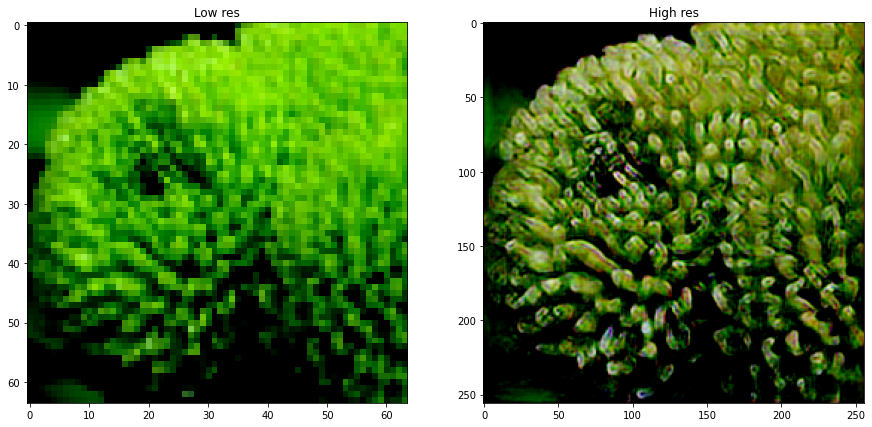

MSE : 0.22511187195777893, PSNR: 59.37803203045087


In [ ]:
index = 6

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

ps = psnr(hr_images[index], generated_high_resolution_images[index])          
ms = mse(hr_images[index], generated_high_resolution_images[index])      
print("MSE : {}, PSNR: {}".format(ms,ps))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


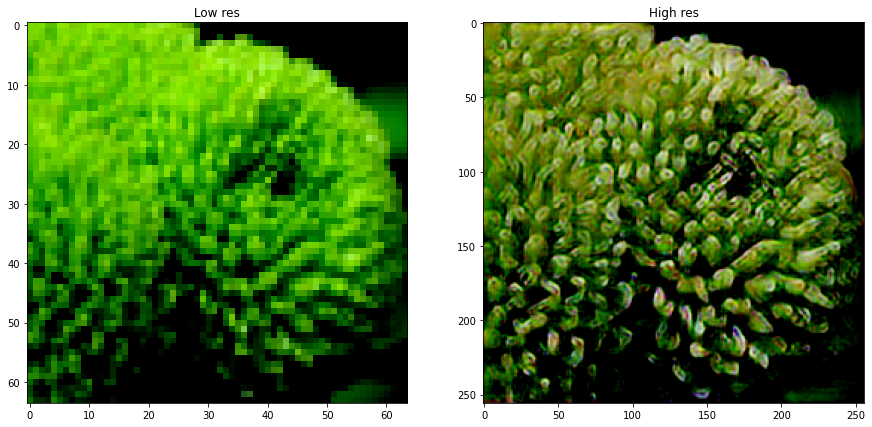

MSE : 0.22287015616893768, PSNR: 59.421496602392665


In [ ]:
index = 6

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

ps = psnr(hr_images[index], generated_high_resolution_images[index])          
ms = mse(hr_images[index], generated_high_resolution_images[index])      
print("MSE : {}, PSNR: {}".format(ms,ps))

<h1> CelebA SRGAN Results </h1>

In [ ]:
# load json and create model
json_file = open('/content/drive/MyDrive/SRCNN_Data/Model/CelebA_generator_json.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
celeba_srgan = model_from_json(loaded_model_json)

# load weights into new model
celeba_srgan.load_weights('/content/drive/MyDrive/SRCNN_Data/Model/CelebA_generator_model_weight.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# data path
TRAIN_PATH = r'/content/drive/MyDrive/SRCNN_Data/CelebA Train'

data_path = TRAIN_PATH

In [ ]:
image_list = get_train_images(data_path)   
hr_images, lr_images = sample_images(image_list, 
                                    low_resolution_shape=low_resolution_shape,
                                    high_resolution_shape=high_resolution_shape)


# normalize the images
hr_images = hr_images / 127.5 - 1.
lr_images = lr_images / 127.5 - 1.

# generate high-resolution images from low-resolution images
celeba_generated_high_resolution_images = celeba_srgan.predict(lr_images)

500


KeyboardInterrupt: ignored

In [ ]:
index = 1

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(celeba_generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

ps = psnr(hr_images[index], celeba_generated_high_resolution_images[index])          
ms = mse(hr_images[index], celeba_generated_high_resolution_images[index])      
print("MSE : {}, PSNR: {}".format(ms,ps))

In [ ]:
index = 2

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(celeba_generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

In [ ]:
index = 3

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(lr_images[index])
ax[0].title.set_text('Low res')
ax[1].imshow(celeba_generated_high_resolution_images[index])
ax[1].title.set_text('High res')
plt.show()

In [ ]:
def predict_model(imgpath,model):

  img1 = imread(imgpath, as_gray=False, pilmode='RGB')
  img1 = img1.astype(np.float32)
  lr_images=[]
  # low_resolution_shape = (64, 64, 3)

  # img1 = cv2.resize(img1, (64,64))
  y=img1

  lr_images.append(y)
  lr_images = np.array(lr_images)

  lr_images = lr_images / 127.5 - 1.

  generated_images = model.predict_on_batch(lr_images)

  return generated_images

In [ ]:
output = predict_model('/content/boy.jpeg',general100_srgan)

In [ ]:
result = ((output+1)*127.5).astype(np.uint8)[0]

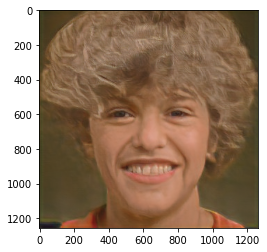

In [ ]:
plt.imshow(result)

In [ ]:
image_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.imwrite('/content/boy_output_G100.jpeg',image_rgb)

True